In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,    
    confusion_matrix
)


## Data Preprocessing

In [2]:
# Set up input data
AAP = 202
SGPT = 22
TB = 0.9
DB = 0.3
SGOT = 19
AGR = 1.2
ALBA = 4.1
AGE=65
GEN=1
TP=6.8


input = np.array([AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR])
columns = ['AGE','GEN','TB', 'DB', 'AAP', 'SGPT', 'SGOT','TP', 'ALBA', 'AGR']
input_df = pd.DataFrame(input.reshape(1,-1), columns=columns)


In [3]:
# Load and preprocess training data
df=pd.read_csv("Liver Patient Dataset (LPD)_train.csv",encoding="unicode_escape")
print(df.columns)
print(input_df.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')
Index(['AGE', 'GEN', 'TB', 'DB', 'AAP', 'SGPT', 'SGOT', 'TP', 'ALBA', 'AGR'], dtype='object')


In [4]:

r={'Age of the patient':'AGE','Gender of the patient':'GEN','Total Bilirubin':'TB','Direct Bilirubin':'DB',
     'Alkphos Alkaline Phosphotase':'AAP','Sgpt Alamine Aminotransferase':'SGPT',
     'Sgot Aspartate Aminotransferase':'SGOT','Total Protiens':'TP','ALB Albumin':'ALBA',
     'A/G Ratio Albumin and Globulin Ratio':'AGR','Result':'Result'}

In [5]:
df.rename(columns=r, inplace=True)

In [6]:
df.head(10)

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [7]:
df.shape

(30691, 11)

In [8]:

# Replace Result column values
# In original Dataset 1=Liver patient and 2=Healthy
# For better understanding Replace 1 with 1 and 0 for 2
d_target = {1: 1, 2: 0}
df.replace({'Result': d_target}, inplace=True)
df.Result.value_counts()


Result
1    21917
0     8774
Name: count, dtype: int64

In [9]:
df.describe()

,AGE,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,0.714118
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [10]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[object])
num_cols = df_num.columns.values[:-1]
cat_cols = df_cat.columns.values
print(num_cols)
print(cat_cols)

['AGE' 'TB' 'DB' 'AAP' 'SGPT' 'SGOT' 'TP' 'ALBA' 'AGR']
['GEN']


In [11]:
df.head(10)

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [12]:
df.isna().sum().sort_values(ascending=False)
#Below we can see the number of empty values(Null) in each columns

GEN       902
AAP       796
TB        648
DB        561
AGR       559
SGPT      538
ALBA      494
TP        463
SGOT      462
AGE         2
Result      0
dtype: int64

In [13]:
#Delete duplicate records
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,AGE,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
count,19367.000000,18811.000000,18878.000000,18674.000000,18909.000000,18975.000000,18998.000000,18955.000000,18932.000000,19368.000000
mean,43.809986,3.315767,1.515637,289.407411,80.598762,110.790672,6.494326,3.141045,0.945888,0.713083
std,16.454988,6.111851,2.863609,239.727272,181.134634,278.927937,1.089985,0.793602,0.322023,0.452334
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,55.000000,2.600000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [15]:
df.isna().sum().sort_values(ascending=False)

GEN       796
AAP       694
TB        557
DB        490
SGPT      459
AGR       436
ALBA      413
SGOT      393
TP        370
AGE         1
Result      0
dtype: int64

In [16]:
df.isna().mean().mul(100).sort_values(ascending=False)

GEN       4.109872
AAP       3.583230
TB        2.875878
DB        2.529946
SGPT      2.369888
AGR       2.251136
ALBA      2.132383
SGOT      2.029120
TP        1.910368
AGE       0.005163
Result    0.000000
dtype: float64

In [17]:
#Replace missing values with mean values
for col in num_cols:
    if df[col].isna().mean()*100 < 15:
        cur_mean = np.mean(df[col])
        df[col] = df[col].fillna(cur_mean)

In [18]:
df.isna().mean().mul(100).sort_values(ascending=False)

GEN       4.109872
AGE       0.000000
TB        0.000000
DB        0.000000
AAP       0.000000
SGPT      0.000000
SGOT      0.000000
TP        0.000000
ALBA      0.000000
AGR       0.000000
Result    0.000000
dtype: float64

In [19]:
df.isna().sum().sort_values(ascending=False)

GEN       796
AGE         0
TB          0
DB          0
AAP         0
SGPT        0
SGOT        0
TP          0
ALBA        0
AGR         0
Result      0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.describe()

,AGE,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,43.821388,3.324554,1.516214,289.845588,80.317461,110.662307,6.494993,3.140064,0.945462,0.714086
std,16.474061,6.069265,2.835645,236.187529,178.371099,274.294339,1.079924,0.785859,0.318758,0.451861
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.800000,0.200000,177.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,214.000000,36.000000,43.000000,6.500000,3.100000,0.945888,1.000000
75%,55.000000,2.700000,1.400000,293.000000,64.000000,90.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [22]:
df.isna().mean().mul(100).sort_values(ascending=False)

AGE       0.0
GEN       0.0
TB        0.0
DB        0.0
AAP       0.0
SGPT      0.0
SGOT      0.0
TP        0.0
ALBA      0.0
AGR       0.0
Result    0.0
dtype: float64

In [23]:
df.isna().sum().sort_values(ascending=False)

AGE       0
GEN       0
TB        0
DB        0
AAP       0
SGPT      0
SGOT      0
TP        0
ALBA      0
AGR       0
Result    0
dtype: int64

In [24]:
df.head(10)

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
0,65.0,Female,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.000000,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.000000,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,80.598762,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.000000,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.000000,19.0,7.4,4.1,1.20,0
9,55.0,Male,0.7,0.2,290.0,53.000000,58.0,6.8,3.4,1.00,1


In [25]:
df.shape

(18572, 11)

In [26]:
df.Result.value_counts()

Result
1    13262
0     5310
Name: count, dtype: int64

In [27]:
# for categorical data (Gender) encode 1 for Male and 0 for Female
enc=LabelEncoder()
df['GEN']=enc.fit_transform(df['GEN'])

In [28]:
for feature in df.columns:
    print(feature,":", len(df[feature].unique()))

AGE : 78
GEN : 2
TB : 114
DB : 81
AAP : 264
SGPT : 153
SGOT : 178
TP : 59
ALBA : 41
AGR : 70
Result : 2


In [29]:
print(df['GEN'].unique());

[0 1]


In [30]:


# Iterate through each column
for column in  num_cols:
    # Calculate quartiles and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate box plot boundaries
    box_min = q1 - (1.5 * iqr)
    box_max = q3 + (1.5 * iqr)
    
    # Display results
    print(f"Column: {column}")
    print(f"Q1 (First Quartile): {q1}")
    print(f"Q3 (Third Quartile): {q3}")
    print(f"IQR (Interquartile Range): {iqr}")
    print(f"Box Plot Minimum: {box_min}")
    print(f"Box Plot Maximum: {box_max}")
    print("--------------------------")


Column: AGE
Q1 (First Quartile): 32.0
Q3 (Third Quartile): 55.0
IQR (Interquartile Range): 23.0
Box Plot Minimum: -2.5
Box Plot Maximum: 89.5
--------------------------
Column: TB
Q1 (First Quartile): 0.8
Q3 (Third Quartile): 2.7
IQR (Interquartile Range): 1.9000000000000001
Box Plot Minimum: -2.05
Box Plot Maximum: 5.550000000000001
--------------------------
Column: DB
Q1 (First Quartile): 0.2
Q3 (Third Quartile): 1.4
IQR (Interquartile Range): 1.2
Box Plot Minimum: -1.5999999999999999
Box Plot Maximum: 3.1999999999999997
--------------------------
Column: AAP
Q1 (First Quartile): 177.0
Q3 (Third Quartile): 293.0
IQR (Interquartile Range): 116.0
Box Plot Minimum: 3.0
Box Plot Maximum: 467.0
--------------------------
Column: SGPT
Q1 (First Quartile): 23.0
Q3 (Third Quartile): 64.0
IQR (Interquartile Range): 41.0
Box Plot Minimum: -38.5
Box Plot Maximum: 125.5
--------------------------
Column: SGOT
Q1 (First Quartile): 26.0
Q3 (Third Quartile): 90.0
IQR (Interquartile Range): 64.0
Bo

In [31]:
for col in num_cols:
    Q1, Q3 = df.loc[:,col].quantile([0.25,0.75]).values
    IQR = Q3-Q1
    box_max = Q3+(1.5*IQR)
    box_min = Q1-(1.5*IQR)
    df.loc[df[col]<box_min, col] = np.NaN
    df.loc[df[col]>box_max, col] = np.NaN

    

In [32]:
df.isna().sum().sort_values(ascending=False)

TB        2637
DB        2413
AAP       2201
SGPT      2119
SGOT      2032
AGR        332
TP         249
AGE         49
GEN          0
ALBA         0
Result       0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum().sort_values(ascending=False)

AGE       0
GEN       0
TB        0
DB        0
AAP       0
SGPT      0
SGOT      0
TP        0
ALBA      0
AGR       0
Result    0
dtype: int64

In [35]:
df.describe()

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
count,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000,12636.000000
mean,43.751978,0.698560,1.270811,0.482303,211.000460,34.972398,43.249744,6.539253,3.251462,0.978318,0.613564
std,16.293928,0.458902,0.903940,0.512003,66.470435,20.113222,31.282708,1.031403,0.747841,0.265153,0.486952
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.700000,1.400000,0.350000,0.000000
25%,32.000000,0.000000,0.700000,0.200000,165.000000,21.000000,23.000000,5.900000,2.700000,0.800000,0.000000
50%,45.000000,1.000000,0.900000,0.200000,195.000000,29.000000,32.000000,6.600000,3.200000,1.000000,1.000000
75%,55.000000,1.000000,1.400000,0.600000,240.000000,44.000000,54.000000,7.200000,3.900000,1.100000,1.000000
max,89.000000,1.000000,5.300000,2.900000,462.000000,123.000000,181.000000,9.200000,5.500000,1.700000,1.000000


In [36]:
df.Result.value_counts()

Result
1    7753
0    4883
Name: count, dtype: int64

In [37]:
df.shape

(12636, 11)

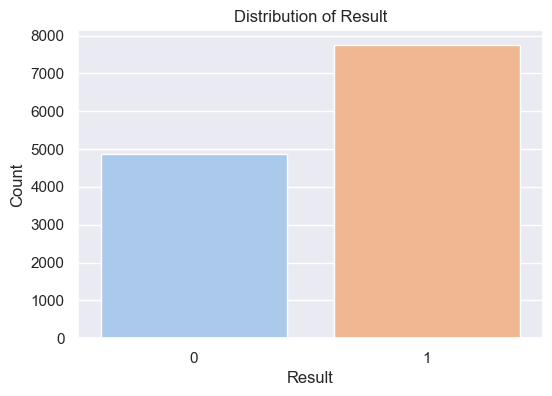

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
sns.countplot(x='Result', data=df, palette='pastel')
plt.title('Distribution of Result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [39]:
df.head(10)

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR,Result
0,65.0,0,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.9,1
3,58.0,1,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.0,1
4,72.0,1,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.4,1
5,46.0,1,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.3,1
6,26.0,0,0.9,0.2,154.0,80.598762,12.0,7.0,3.5,1.0,1
7,29.0,0,0.9,0.3,202.0,14.000000,11.0,6.7,3.6,1.1,1
8,17.0,1,0.9,0.3,202.0,22.000000,19.0,7.4,4.1,1.2,0
9,55.0,1,0.7,0.2,290.0,53.000000,58.0,6.8,3.4,1.0,1
10,57.0,1,0.6,0.1,210.0,51.000000,59.0,5.9,2.7,0.8,1
11,72.0,1,2.7,1.3,260.0,31.000000,56.0,7.4,3.0,0.6,1


In [40]:
print(type(num_cols))
print(type(cat_cols))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [43]:
# Separate features (X) and target (y)
X = df.drop(['Result'], axis=1)
y = df.Result

In [44]:
X

,AGE,GEN,TB,DB,AAP,SGPT,SGOT,TP,ALBA,AGR
0,65.0,0,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.9
3,58.0,1,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.0
4,72.0,1,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.4
5,46.0,1,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.3
6,26.0,0,0.9,0.2,154.0,80.598762,12.0,7.0,3.5,1.0
...,...,...,...,...,...,...,...,...,...,...
29892,28.0,1,3.3,1.5,172.0,25.000000,41.0,5.6,2.4,0.7
29893,21.0,0,1.2,0.4,160.0,20.000000,22.0,6.2,3.0,0.9
29894,32.0,1,0.6,0.1,196.0,29.000000,30.0,5.8,2.9,1.0
29976,28.0,1,1.9,1.0,231.0,16.000000,55.0,4.3,1.6,0.6


In [45]:
y

0        1
3        1
4        1
5        1
6        1
        ..
29892    1
29893    0
29894    1
29976    1
30689    1
Name: Result, Length: 12636, dtype: int64

In [46]:
# Initialize StratifiedKFold with desired number of folds or n_splits (default is 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

In [47]:
# Initialize StandardScaler for numerical columns
scaler = StandardScaler()


In [48]:
#RF with hyper parameter tunned

In [49]:
metrics = pd.DataFrame(index=['Accuracy', 'Precission', 'Recall', 'F1_score', 'ROC_AUC'])

In [50]:
confussion_matrix_list = []

## Models

### Random Forest

In [51]:
random_forest_best_params = {'bootstrap': True, 'criterion': 'log_loss', 
                             'max_depth': 70, 'max_features': 'log2', 
                             'n_estimators': 500}
random_forest_best_score = 0.9997873910277993

In [52]:
# Random Forest
random_forest = RandomForestClassifier(**random_forest_best_params)

Accuracy = []
Precission = []
Recall = []
F1_score = []
ROC_AUC = []

In [53]:
# Perform stratified k-fold cross-validation

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply StandardScaler to numerical columns
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    
    # Optionally, you can include GEN column after scaling
    # Add scaled GEN column back to X_train_scaled and X_test_scaled
    X_train_scaled['GEN'] = X_train['GEN']
    X_test_scaled['GEN'] = X_test['GEN']
    
    # Train classifier
    random_forest.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    random_forest_y_pred = random_forest.predict(X_test_scaled)
    random_forest_y_score = random_forest.predict_proba(X_test_scaled)[:, 1]

    Accuracy.append(accuracy_score(y_test, random_forest_y_pred))
    Precission.append(precision_score(y_test, random_forest_y_pred))
    Recall.append(recall_score(y_test, random_forest_y_pred))
    F1_score.append(f1_score(y_test, random_forest_y_pred))
    ROC_AUC.append(roc_auc_score(y_test, random_forest_y_score))
    print("-----------------------------------------------------------------------------------------------------")
confussion_matrix_list.append(y_test)
confussion_matrix_list.append( random_forest_y_pred)


TRAIN: [    0     1     2 ... 12633 12634 12635] TEST: [    3    13    14 ... 12619 12622 12626]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12631 12634 12635] TEST: [    6     8    20 ... 12630 12632 12633]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12632 12633 12635] TEST: [    4     9    11 ... 12603 12628 12634]
-----------------------------------------------------------------------------------------------------
TRAIN: [    2     3     4 ... 12633 12634 12635] TEST: [    0     1     7 ... 12615 12616 12620]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     3 ... 12632 12633 12634] TEST: [    2     5    10 ... 12627 12631 12635]
-----------------------------------------------------------------------------------------------------


In [54]:
metrics["Random Forest"] = [
    np.mean(Accuracy),
    np.mean(Precission),
    np.mean(Recall),
    np.mean(F1_score),
    np.mean(ROC_AUC)
]

In [55]:
print(metrics["Random Forest"])

Accuracy      0.993273
Precission    0.991547
Recall        0.997549
F1_score      0.994536
ROC_AUC       0.999706
Name: Random Forest, dtype: float64


### SVM

In [56]:
svm_best_params = {'C': 15, 'kernel': 'rbf'}
svm_best_score = 0.9000298490572322


In [57]:
# SVM
svm = SVC(**svm_best_params, probability=True)
skf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

In [58]:
# Perform stratified k-fold cross-validation
for train_index, test_index in skf1.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply StandardScaler to numerical columns
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    
    # Optionally, you can include GEN column after scaling
    # Add scaled GEN column back to X_train_scaled and X_test_scaled
    X_train_scaled['GEN'] = X_train['GEN']
    X_test_scaled['GEN'] = X_test['GEN']
    
    # Train classifier
    svm.fit(X_train_scaled, y_train)

    # Predict and evaluate
    svm_y_pred = svm.predict(X_test_scaled)
    svm_y_score = svm.predict_proba(X_test_scaled)[:, 1]
    
    Accuracy.append(accuracy_score(y_test, svm_y_pred))
    Precission.append(precision_score(y_test, svm_y_pred))
    Recall.append(recall_score(y_test, svm_y_pred))
    F1_score.append(f1_score(y_test, svm_y_pred))
    ROC_AUC.append(roc_auc_score(y_test, svm_y_score))
    print("-----------------------------------------------------------------------------------------------------")
    
confussion_matrix_list.append(y_test)
confussion_matrix_list.append(svm_y_pred)


TRAIN: [    0     1     2 ... 12633 12634 12635] TEST: [    3    13    14 ... 12619 12622 12626]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12631 12634 12635] TEST: [    6     8    20 ... 12630 12632 12633]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12632 12633 12635] TEST: [    4     9    11 ... 12603 12628 12634]
-----------------------------------------------------------------------------------------------------
TRAIN: [    2     3     4 ... 12633 12634 12635] TEST: [    0     1     7 ... 12615 12616 12620]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     3 ... 12632 12633 12634] TEST: [    2     5    10 ... 12627 12631 12635]
-----------------------------------------------------------------------------------------------------


In [59]:
metrics["SVM"] = [
    np.mean(Accuracy),
    np.mean(Precission),
    np.mean(Recall),
    np.mean(F1_score),
    np.mean(ROC_AUC)
]

In [60]:
print(metrics["SVM"])

Accuracy      0.907012
Precission    0.913348
Recall        0.939766
F1_score      0.926223
ROC_AUC       0.953693
Name: SVM, dtype: float64


### Logistic Regression

In [61]:
lr_best_params = {'C': 1000.0, 'l1_ratio': 0.1, 'max_iter': 850, 'penalty': 'elasticnet', 'solver': 'saga'}
lr_best_score = 0.6462995456766315


In [62]:
# Logistic Regression
lr = LogisticRegression(**lr_best_params, class_weight="balanced")
skf3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

for train_index, test_index in skf3.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply StandardScaler to numerical columns
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    
    # Optionally, you can include GEN column after scaling
    # Add scaled GEN column back to X_train_scaled and X_test_scaled
    X_train_scaled['GEN'] = X_train['GEN']
    X_test_scaled['GEN'] = X_test['GEN']
    
    # Train classifier
    lr.fit(X_train_scaled, y_train)

    lr_y_pred = lr.predict(X_test_scaled)
    lr_y_score = lr.predict_proba(X_test_scaled)[:, 1]
    
    Accuracy.append(accuracy_score(y_test, lr_y_pred))
    Precission.append(precision_score(y_test, lr_y_pred) )
    Recall.append(recall_score(y_test, lr_y_pred))
    F1_score.append(f1_score(y_test, lr_y_pred))
    ROC_AUC.append(roc_auc_score(y_test, lr_y_score))
    print("-----------------------------------------------------------------------------------------------------")
confussion_matrix_list.append(y_test)
confussion_matrix_list.append(lr_y_pred)
    

TRAIN: [    0     1     2 ... 12633 12634 12635] TEST: [    3    13    14 ... 12619 12622 12626]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12631 12634 12635] TEST: [    6     8    20 ... 12630 12632 12633]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 12632 12633 12635] TEST: [    4     9    11 ... 12603 12628 12634]
-----------------------------------------------------------------------------------------------------
TRAIN: [    2     3     4 ... 12633 12634 12635] TEST: [    0     1     7 ... 12615 12616 12620]
-----------------------------------------------------------------------------------------------------
TRAIN: [    0     1     3 ... 12632 12633 12634] TEST: [    2     5    10 ... 12627 12631 12635]
-----------------------------------------------------------------------------------------------------


In [63]:
metrics["Logistic Regression"] = [
    np.mean(Accuracy),
    np.mean(Precission),
    np.mean(Recall),
    np.mean(F1_score),
    np.mean(ROC_AUC)
]

In [64]:
print(metrics["Logistic Regression"])

Accuracy      0.799594
Precission    0.852617
Recall        0.796982
F1_score      0.818086
ROC_AUC       0.851289
Name: Logistic Regression, dtype: float64


## Metrics

In [65]:
print(metrics)

            Random Forest       SVM  Logistic Regression
Accuracy         0.993273  0.907012             0.799594
Precission       0.991547  0.913348             0.852617
Recall           0.997549  0.939766             0.796982
F1_score         0.994536  0.926223             0.818086
ROC_AUC          0.999706  0.953693             0.851289


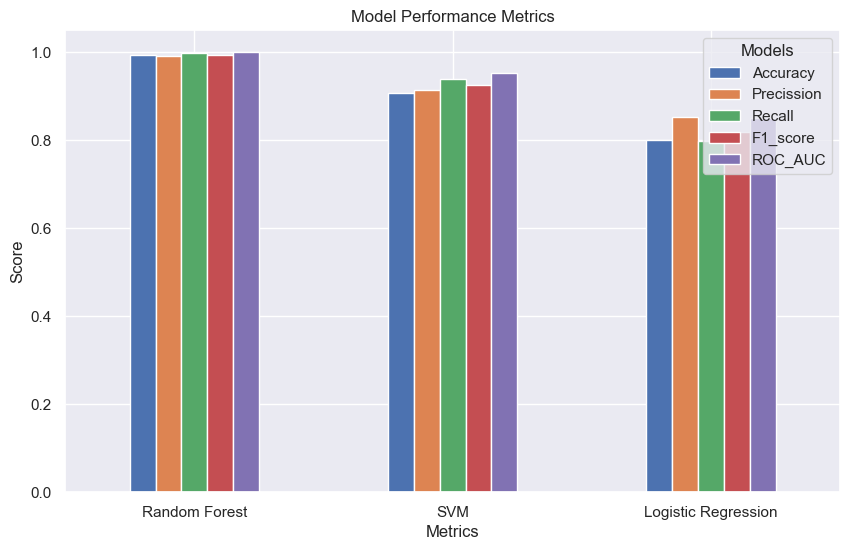

<Figure size 640x480 with 0 Axes>

In [66]:

metrics = metrics.transpose()

# Plot the bar chart
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Models')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()
plt.savefig('performance_nonum.png')


<Figure size 1000x600 with 0 Axes>

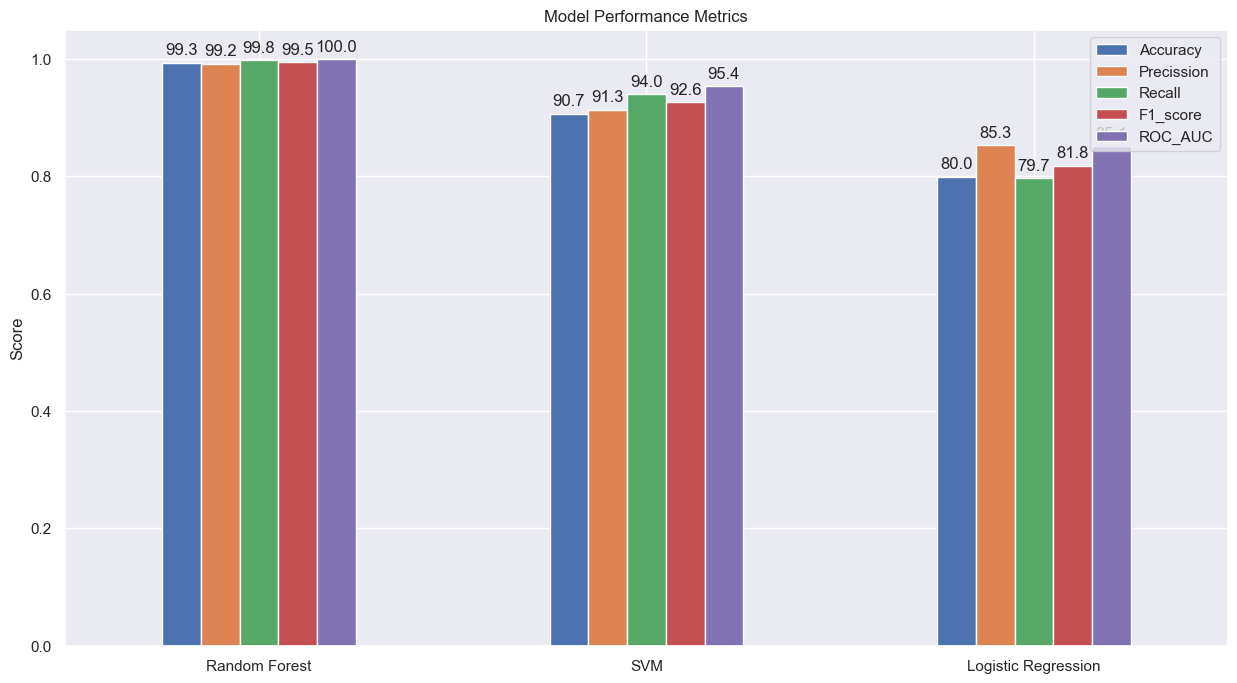

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(10, 6))

ax = metrics.plot(kind='bar', figsize=(15, 8))

for i in ax.patches:
   ax.annotate(f"{i.get_height()*100:.1f}", 
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
plt.savefig('performance_num.png')

## Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix Random Forest')

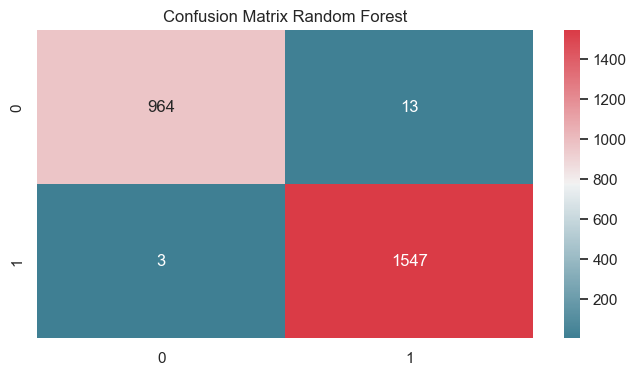

In [68]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(confusion_matrix(confussion_matrix_list[0], confussion_matrix_list[1]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix Random Forest")

Text(0.5, 1.0, 'Confusion Matrix SVM')

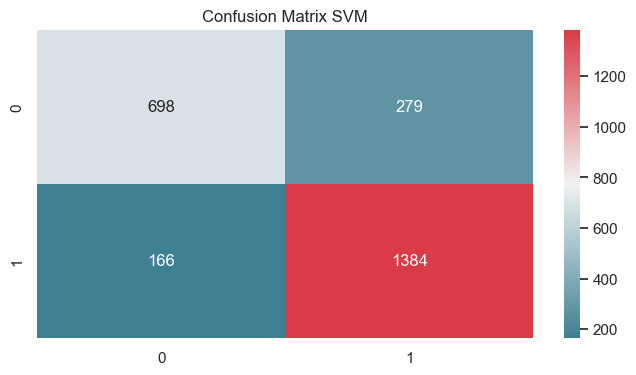

In [69]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(confusion_matrix(confussion_matrix_list[2], confussion_matrix_list[3]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix SVM")

Text(0.5, 1.0, 'Confusion MatrixLogistic Regression')

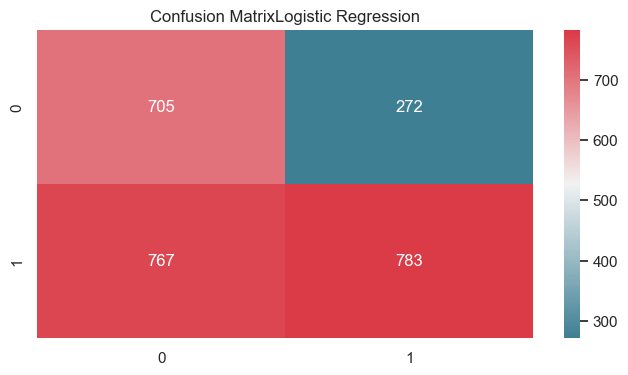

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(confusion_matrix(confussion_matrix_list[4], confussion_matrix_list[5]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion MatrixLogistic Regression")

## AUC_ROC

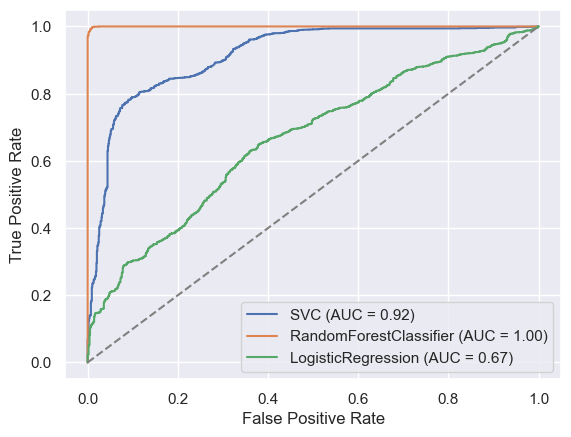

In [71]:
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(random_forest, X_test_scaled, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test, ax=disp.ax_);
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('Auc_Roc.png')


## Model Saving

In [72]:
best_model = random_forest

In [73]:
import joblib

joblib.dump(best_model, 'best_model_rf.pkl')

model = joblib.load('best_model_rf.pkl')
result = model.predict(input_df)
print(result)

[1]
